# Python Data Visualisations

This project features a full dashboard in Tableau, however we will create some initial visualisation in python for Exploratory Data Analysis (EDA).

### First import the required libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

### Load the clean data ready for visualisations

In [41]:
df = pd.read_csv('../data/clean-agriculturedata.csv')
df.head()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,Brazil,South East,Rice,2.64,514.15,21.96,0.639,4,15.95,25.39,42.58,85.01,Drought-resistant Crops,116.07
1,1995,India,Punjab,Vegetables,13.98,1940.83,6.11,4.100,6,74.79,33.24,74.95,96.05,Drought-resistant Crops,1026.14
2,1996,Brazil,South,Rice,34.76,247.44,8.42,2.520,2,52.69,6.56,10.86,56.99,Water Management,837.28
3,1994,China,Central,Corn,19.10,2042.70,4.88,1.520,8,93.98,42.48,52.78,65.33,No Adaptation,369.90
4,2018,Nigeria,North Central,Vegetables,-2.34,2716.87,23.37,1.593,6,22.09,41.06,8.44,99.04,Drought-resistant Crops,555.35


### Generate summary statistics for EDA

In [42]:
df.describe()

,Year,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Economic_Impact_Million_USD
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,2007.055333,15.242330,1612.406231,15.247996,2.239041,4.967111,55.218140,25.027886,49.789878,64.942692,674.045610
std,10.067692,11.470811,805.682931,8.611049,0.997074,3.159294,25.965401,14.505403,28.732147,20.209407,414.380078
min,1990.000000,-4.990000,200.150000,0.500000,0.450000,0.000000,10.010000,0.000000,0.010000,30.020000,47.840000
25%,1998.750000,5.390000,925.837500,7.710000,1.450000,2.000000,32.780000,12.600000,25.220000,47.130000,350.730000
50%,2007.000000,15.160000,1611.160000,15.235000,2.170000,5.000000,55.030000,25.000000,49.345000,64.710000,583.875000
75%,2016.000000,25.380000,2310.980000,22.842500,2.930000,8.000000,77.550000,37.572500,74.680000,82.565000,918.752500
max,2024.000000,35.000000,2999.670000,30.000000,5.000000,10.000000,99.990000,49.990000,99.990000,100.000000,2346.470000


From this we can see the mean and standard deviation for each variable.

### Looking at extreme weather events throughout time

Text(0, 0.5, 'Number of Extreme Weather Events')

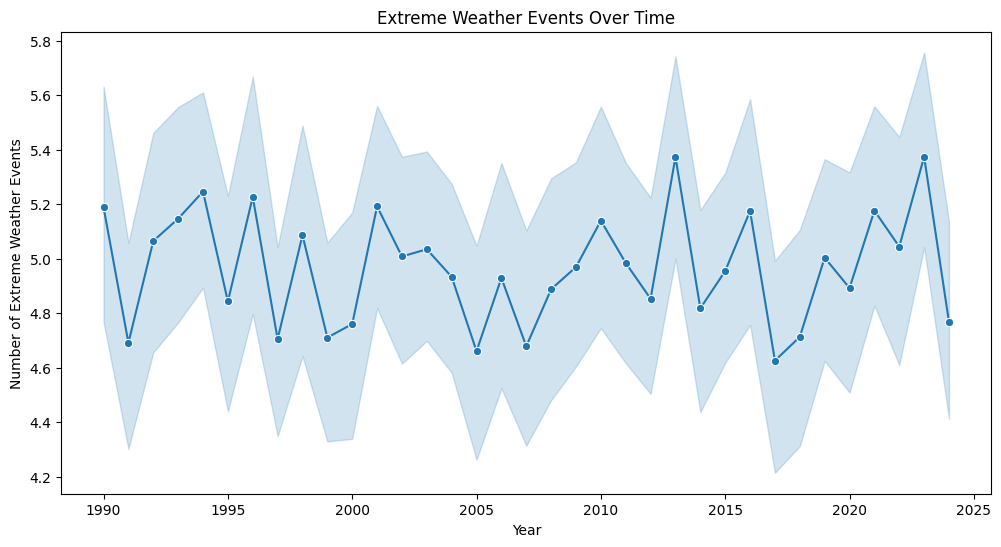

In [43]:
 
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Extreme_Weather_Events', marker='o') #seaborn visualisation of extreme weather events over time 
plt.title('Extreme Weather Events Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Extreme Weather Events')


There doesn't seem to be a clear pattern of extreme weather events increasing over time. This is not a direction we are going to investigate any further.

### Distribution of crop yield

In [44]:
%pip install nbformat>-4.2.0 #due to a bug I'm having to run this command to install the latest version of nbformat to ge the graphs to display correctly.

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#due': Expected package name at the start of dependency specifier
    #due
    ^


In [45]:
fig = px.histogram(df, x="Crop_Yield_MT_per_HA", marginal="box",title="Crop Yield Distribution") #please note this plotly graph will not be visible on github, please fork the repo and run locally to see the graph.
fig.update_layout(xaxis_title="Crop Yield (MT per HA)", yaxis_title="Count") 
fig.show()

The Crop Yield is not normally distrubted with a median of 2.17 MT per HA and distribution skewing towards lower values. This suggests that non parametric tests would be appropriate. 

### Distribution of CO2 emsissions

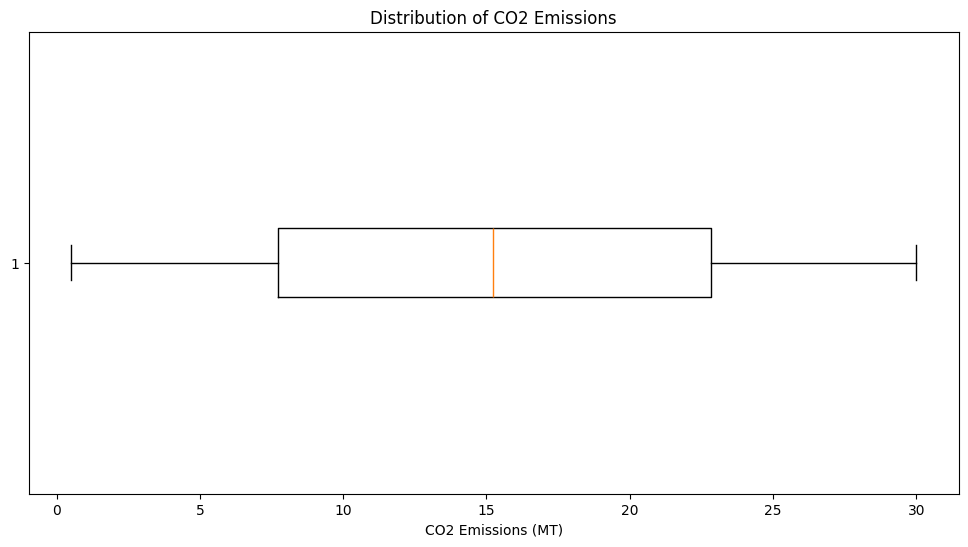

In [46]:
plt.figure(figsize=(12, 6))
plt.boxplot(df['CO2_Emissions_MT'], vert=False)
plt.title('Distribution of CO2 Emissions') #matplotlib boxplot of CO2 emissions
plt.xlabel('CO2 Emissions (MT)')
plt.show()

We can see that CO2 emissions follow a normal distribution, meaning parametric tests would be suitable for this variable

### Economic Impact V Crop Yield

We check the relationship betwee crop yield and economic impact as it might be an area we wish to investigate further. Moreover the column 'Economic_Impact_Million_USD' is amibiguous, as it could mean either economic growth or economic damage, by comparing it with a variable that will obviously generate more growth such as crop yield we can determine if the economic impact is a positive or negative impact. 

In [47]:
fig = px.scatter(
    df,
    x="Crop_Yield_MT_per_HA",   # This graph was created with help from Copilot
    y="Economic_Impact_Million_USD",     # Note: This graph won't render on GitHub; fork and run locally to see the output.
    color="Extreme_Weather_Events",
    hover_data=["Year", "Soil_Health_Index", "CO2_Emissions_MT"],
    title="Economic Impact vs Crop Yield (Colour by Extreme Weather)"
)

fig.show()



There is a clear positive correlation between increased crop yield and increased economic impact. This relationship demonstrates that economic impact in this paticular dataset is a positive rather than a negative impact. With such a clear correlation, we would like to investigate this further in this project. Extreme weatrher however does not seem to show a clear pattern with these varaibles.